In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime


In [4]:
import pandas_datareader as web


In [5]:
data = web.get_data_yahoo('AMD', 
                          start=datetime(2009, 1, 1), 
                          end=datetime(2019, 12, 31))

In [6]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,46.610001,45.770000,46.099998,46.540001,44432200,46.540001
2019-12-26,47.310001,45.660000,46.990002,46.630001,57562800,46.630001
2019-12-27,46.880001,45.980000,46.849998,46.180000,36581300,46.180000
2019-12-30,46.169998,44.660000,46.139999,45.520000,41149700,45.520000
2019-12-31,46.090000,44.919998,45.070000,45.860001,31673200,45.860001


In [7]:
data.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-12-31,2.20,2.11,2.20,2.16,10226500,2.16
2009-01-02,2.43,2.17,2.19,2.38,13832100,2.38
2009-01-05,2.68,2.35,2.37,2.67,19326900,2.67
2009-01-06,2.85,2.55,2.75,2.78,23860000,2.78
2009-01-07,2.72,2.55,2.72,2.66,14026300,2.66


In [8]:
# removing first row so that it starts from 2009
data = data.iloc[1:]
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,2.43,2.17,2.19,2.38,13832100,2.38
2009-01-05,2.68,2.35,2.37,2.67,19326900,2.67
2009-01-06,2.85,2.55,2.75,2.78,23860000,2.78
2009-01-07,2.72,2.55,2.72,2.66,14026300,2.66
2009-01-08,2.74,2.51,2.64,2.74,13413000,2.74


In [9]:
# making short and long term period window

short_period = 40
long_period = 100


In [10]:
# calculating sma of short term period

data["short_mavg"] = data["Adj Close"].rolling(window=short_period).mean()

# calculating sma of long term period

data["long_mavg"] = data["Adj Close"].rolling(window=long_period).mean()
data

,High,Low,Open,Close,Volume,Adj Close,short_mavg,long_mavg
Date,,,,,,,,
2009-01-02,2.430000,2.170000,2.190000,2.380000,13832100,2.380000,NaN,NaN
2009-01-05,2.680000,2.350000,2.370000,2.670000,19326900,2.670000,NaN,NaN
2009-01-06,2.850000,2.550000,2.750000,2.780000,23860000,2.780000,NaN,NaN
2009-01-07,2.720000,2.550000,2.720000,2.660000,14026300,2.660000,NaN,NaN
2009-01-08,2.740000,2.510000,2.640000,2.740000,13413000,2.740000,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-12-24,46.610001,45.770000,46.099998,46.540001,44432200,46.540001,39.15200,33.9582
2019-12-26,47.310001,45.660000,46.990002,46.630001,57562800,46.630001,39.49200,34.1446
2019-12-27,46.880001,45.980000,46.849998,46.180000,36581300,46.180000,39.81825,34.3178


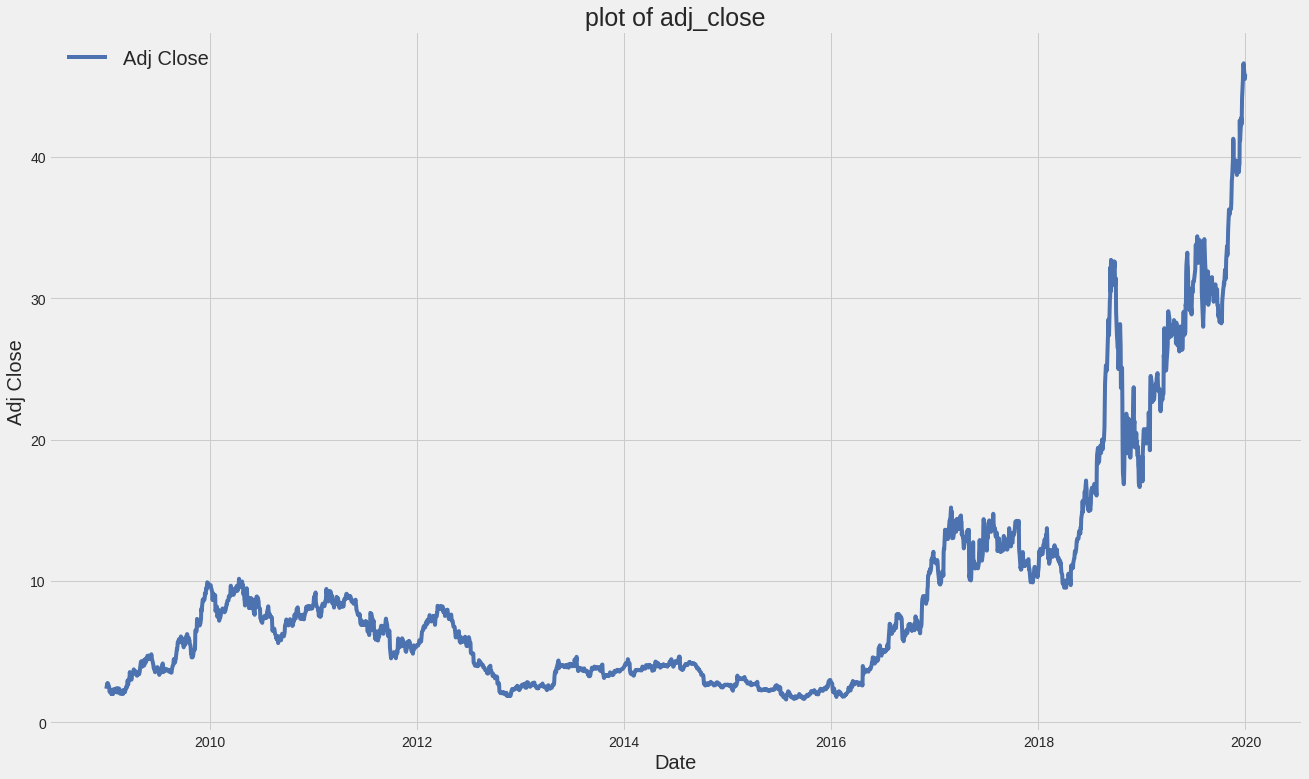

In [37]:
# plotting "Adj Close"

fig = plt.figure(figsize=(20,12))
ax1 = plt.plot(data["Adj Close"])
ax1 = plt.title("plot of adj_close", fontsize=25)
ax1 = plt.xlabel("Date", fontsize=20)
ax1 = plt.ylabel("Adj Close", fontsize=20)
ax1 = plt.legend(["Adj Close"],prop={"size":20}, loc="upper left")
plt.grid(True)
plt.show()

In [12]:
mpl.style.available

['bmh',
 'seaborn-dark-palette',
 'Solarize_Light2',
 'fivethirtyeight',
 'seaborn-muted',
 'seaborn',
 'tableau-colorblind10',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-white',
 'seaborn-poster',
 'seaborn-whitegrid',
 'seaborn-talk',
 'dark_background',
 'seaborn-bright',
 'seaborn-notebook',
 'seaborn-darkgrid',
 'classic',
 'seaborn-dark',
 'seaborn-paper',
 'seaborn-ticks',
 'seaborn-deep',
 'ggplot',
 'seaborn-colorblind',
 'fast',
 'grayscale']

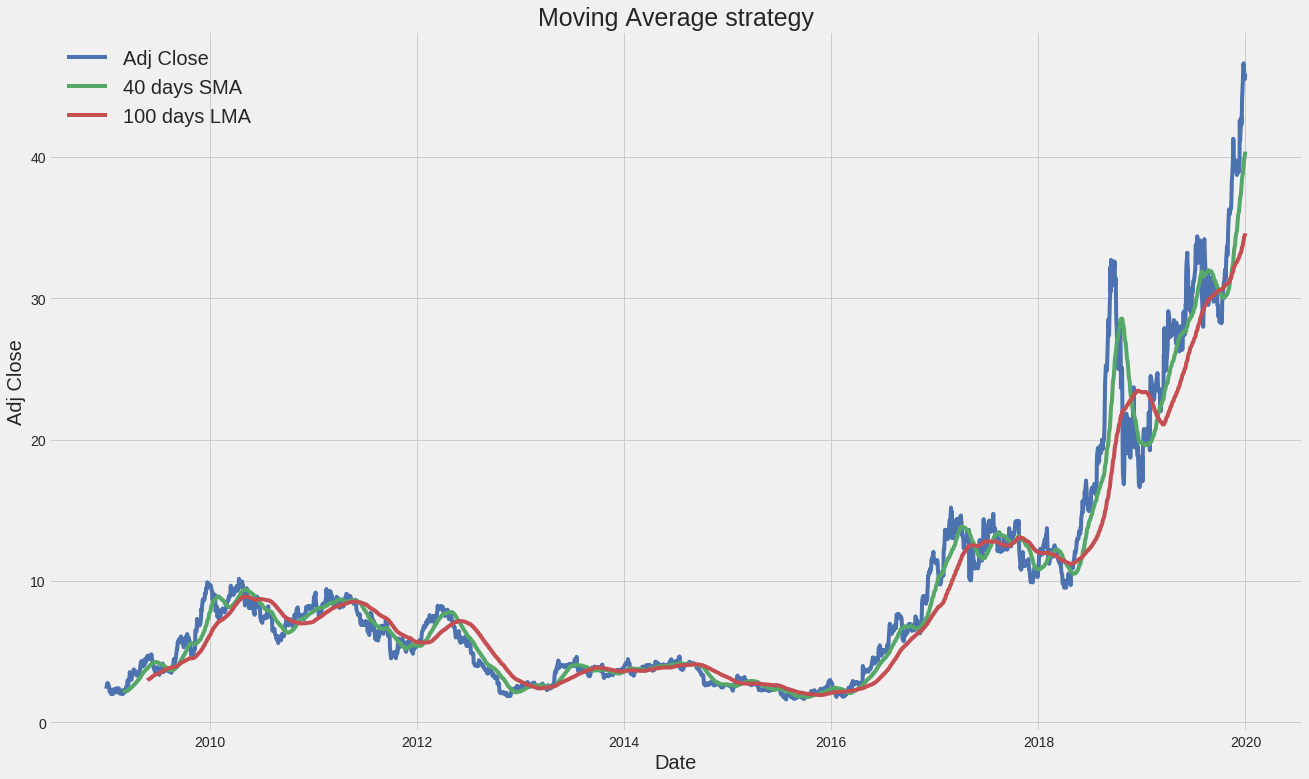

In [13]:
# plotting "Adj close" and sma of both short and long term


plt.style.use('seaborn-dark')
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-deep')
fig = plt.figure(figsize=(20,12))
ax1 = plt.plot(data["Adj Close"])
ax1 = plt.plot(data["short_mavg"])
ax1 = plt.plot(data["long_mavg"])
ax1 = plt.title("Moving Average strategy", fontsize=25)
ax1 = plt.xlabel("Date", fontsize=20)
ax1 = plt.ylabel("Adj Close", fontsize=20)
ax1 = plt.legend(["Adj Close", "40 days SMA", "100 days LMA"],prop={"size":20}, loc="upper left")
plt.grid(True)
plt.show()

In [38]:
# Creating  a 'signal' (invested or not invested) when the short moving average crosses the long moving average, but only for the period greater than the shortest moving average wind

data['signal'] = 0.0    
data['signal'][short_period:] = np.where(data['short_mavg'][short_period:]> data['long_mavg'][short_period:], 1.0, 0.0)   

# Taking the difference of the signals in order to generate actual trading orders
data['position'] = data['signal'].diff()
data
        

/home/prashant/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,High,Low,Open,Close,Volume,Adj Close,short_mavg,long_mavg,signal,positions,position
Date,,,,,,,,,,,
2009-01-02,2.430000,2.170000,2.190000,2.380000,13832100,2.380000,NaN,NaN,0.0,NaN,NaN
2009-01-05,2.680000,2.350000,2.370000,2.670000,19326900,2.670000,NaN,NaN,0.0,0.0,0.0
2009-01-06,2.850000,2.550000,2.750000,2.780000,23860000,2.780000,NaN,NaN,0.0,0.0,0.0
2009-01-07,2.720000,2.550000,2.720000,2.660000,14026300,2.660000,NaN,NaN,0.0,0.0,0.0
2009-01-08,2.740000,2.510000,2.640000,2.740000,13413000,2.740000,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,46.610001,45.770000,46.099998,46.540001,44432200,46.540001,39.15200,33.9582,1.0,0.0,0.0
2019-12-26,47.310001,45.660000,46.990002,46.630001,57562800,46.630001,39.49200,34.1446,1.0,0.0,0.0
2019-12-27,46.880001,45.980000,46.849998,46.180000,36581300,46.180000,39.81825,34.3178,1.0,0.0,0.0


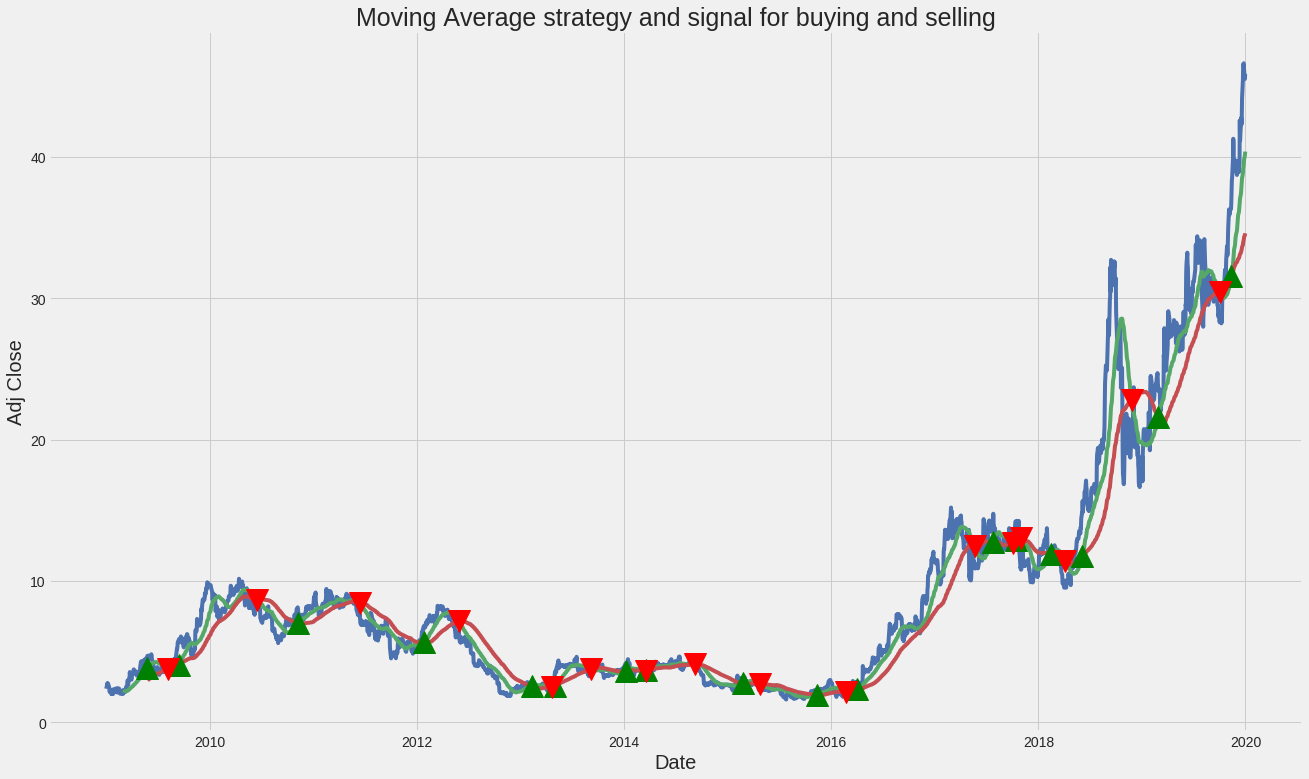

In [39]:
# plotting "Adj close" ,sma of both short and long term, buying and selling signals 

plt.style.use('seaborn-dark')
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-deep')
fig = plt.figure(figsize=(20,12))
ax1 = plt.title("Moving Average strategy and signal for buying and selling", fontsize=25)
ax1 = plt.xlabel("Date", fontsize=20)
ax1 = plt.ylabel("Adj Close", fontsize=20)
ax1 = plt.legend(["Adj Close", "40 days SMA", "100 days LMA"],prop={"size":20}, loc="upper left")
ax1 = plt.plot(data["Adj Close"])
ax1 = plt.plot(data["short_mavg"])
ax1 = plt.plot(data["long_mavg"])

ax1 = plt.plot(data.loc[data.position==1.0].index,data.short_mavg[data.positions==1.0],'^',markersize=22,color='g')
ax1 = plt.plot(data.loc[data.position==-1.0].index,data.short_mavg[data.positions==-1.0],'v',markersize=22,color='r')

plt.grid(True)
plt.show()

In [35]:
# backtesting on the strategy
# Creating a portfolio, with $100,000 initial capital and buying 100 shares
# intializing the portfolio with value owned and add 'holdings', 'cash','total'.'returns' to it


initial_cap=float(100000)
positions=pd.DataFrame(index=data.index).fillna(0.0)
positions['symbol']=100*data['signal']
portfolio = positions.multiply(data['Adj Close'],axis=0)
pos_diff = positions.diff()
portfolio['holdings'] = (positions.multiply(data['Adj Close'],axis=0)).sum(axis=1)
portfolio['cash'] = initial_cap - (pos_diff.multiply(data['Adj Close'],axis=0)).sum(axis=1).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()
portfolio.tail()

,symbol,holdings,cash,total,returns
Date,,,,,
2019-12-24,4654.000092,4654.000092,97563.00025,102217.000341,0.001058
2019-12-26,4663.000107,4663.000107,97563.00025,102226.000357,0.000088
2019-12-27,4618.000031,4618.000031,97563.00025,102181.000280,-0.000440
2019-12-30,4552.000046,4552.000046,97563.00025,102115.000296,-0.000646
2019-12-31,4586.000061,4586.000061,97563.00025,102149.000311,0.000333


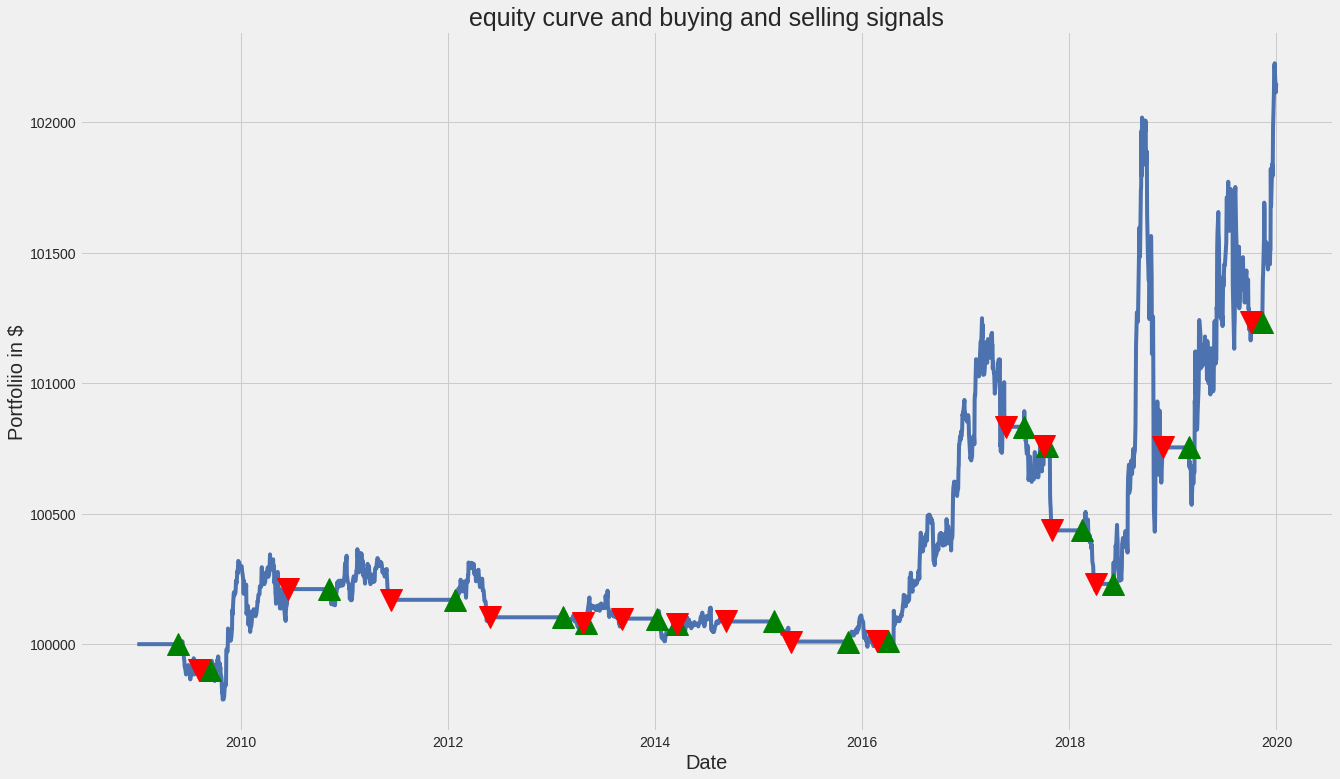

In [40]:
# plotting portfolio value and buying and selling signals

fig = plt.figure(figsize=(20,12))
ax1 = plt.title("equity curve and buying and selling signals", fontsize=25)
ax1 = plt.xlabel("Date", fontsize=20)
ax1 = plt.ylabel("Portfoliio in $", fontsize=20)
ax1 = plt.plot(portfolio["total"])
ax1 = plt.plot(portfolio.loc[data.position==1.0].index,portfolio.total[data.positions==1.0],'^',markersize=22,color='g')
ax1 = plt.plot(portfolio.loc[data.position==-1.0].index,portfolio.total[data.positions==-1.0],'v',markersize=22,color='r')
plt.show()